# Data visualization
This file contain the different plots for the Instacart Basket Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating a path for this project
path = r'C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achivement4\01_23_InstacartBasketAnalysis_CarlosBaena'
print(path)

C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achivement4\01_23_InstacartBasketAnalysis_CarlosBaena


In [3]:
# Importing 'orders_products_merged.pkl' via pandas.pkl and os.path.join
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

In [10]:
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [4]:
#checking imported file 
df_ords_prods_all.shape

(32404859, 31)

### Barcharts

<AxesSubplot:>

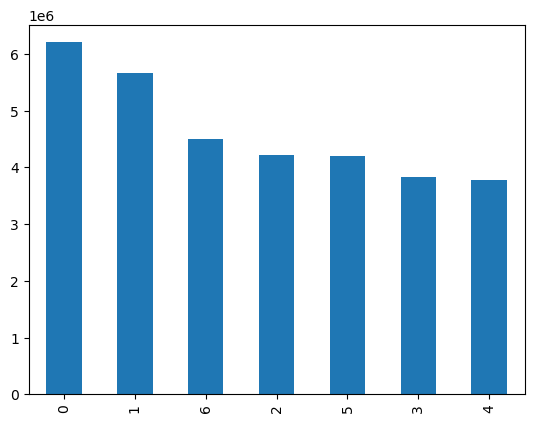

In [6]:
# creating  bar charts
df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

([<matplotlib.axis.XTick at 0x226e6840be0>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

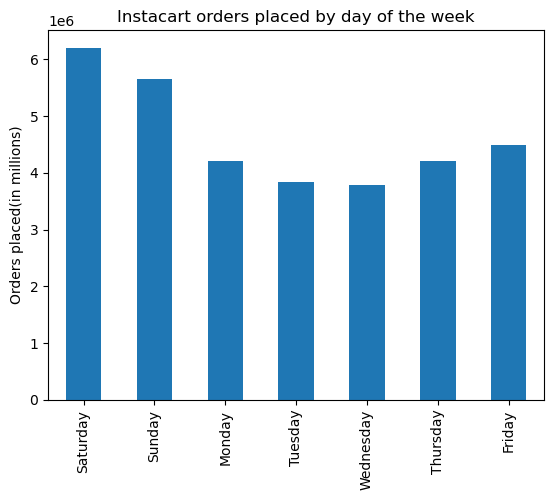

In [13]:
# Sorting
bar_ords_week = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel("")
plt.ylabel("Orders placed(in millions)")
plt.title ("Instacart orders placed by day of the week")
plt.xticks([0,1,2,3,4,5,6],['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])

### Histogram

Text(0.5, 1.0, 'Frequency of Instacart products-price')

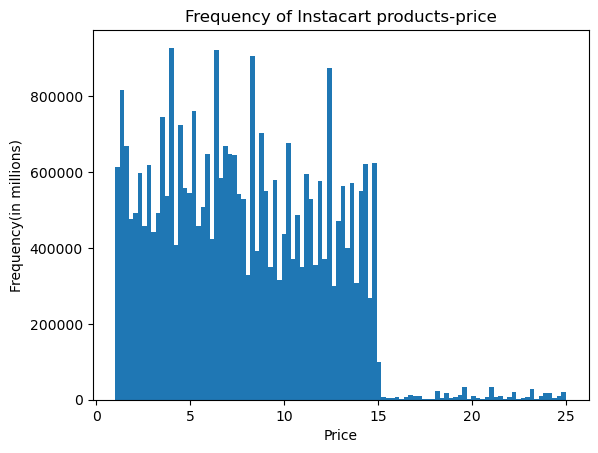

In [12]:
# Creating a histogram for prices
hist_prices = df_ords_prods_all['prices'].plot.hist(bins = 100)
plt.xlabel("Price")
plt.ylabel("Frequency(in millions)")
plt.title ("Frequency of Instacart products-price")

### Scatterplot

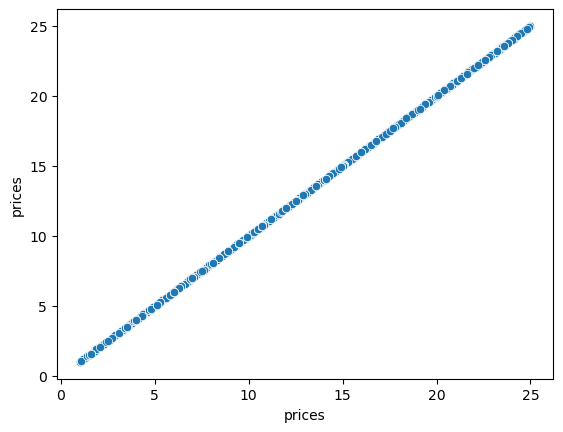

In [28]:
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_all)


### Sampling data

In [18]:
# Create a list holding true/false values to test np.random.rand()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
# Store 70 % of the sample in dataframe big
big = df_ords_prods_all[dev]

In [20]:
# Store 30 % of the sample in dataframe small
small = df_ords_prods_all[~dev]

In [17]:
# Checking partition
len(df_ords_prods_all)

32404859

In [18]:
# Checking partition
len(big) + len(small)

32404859

In [22]:
# creating a subset data frame for our line chart
df_small = small[['orders_day_of_week','prices']]

### Line chart

Text(0.5, 1.0, 'Average price of Instacard products purchased by hour of day')

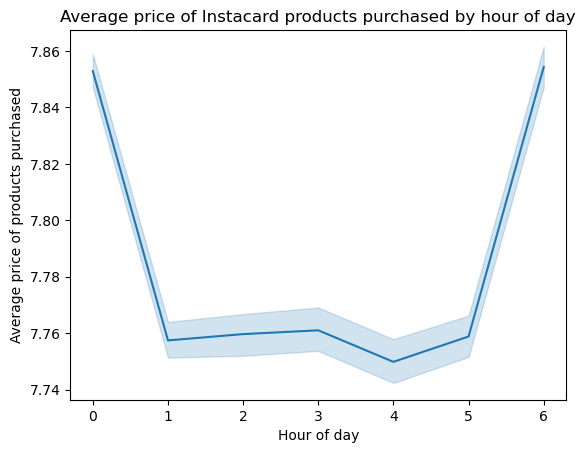

In [25]:
# creating a line chart
line_chart_week_prices = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')
plt.xlabel("Hour of day")
plt.ylabel("Average price of products purchased")
plt.title ("Average price of Instacard products purchased by hour of day")

## Q3. you need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.¶
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0.5, 1.0, 'Frequency of instacart orders placed by hour of day')

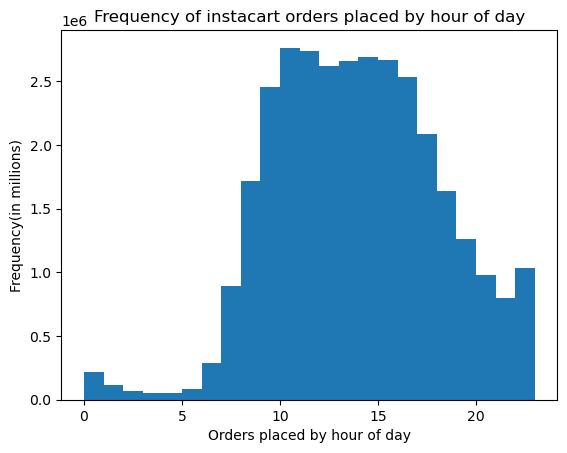

In [11]:
# Creating a histogram for orders placed by hour
hist_hour_of_day = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 23)
plt.xlabel("Orders placed by hour of day")
plt.ylabel("Frequency(in millions)")
plt.title ("Frequency of instacart orders placed by hour of day")

#### The histogram is showing the frequency values of orders per hour in the whole dataset

## Q4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

([<matplotlib.axis.XTick at 0x2268e290790>,
 [Text(0, 0, 'Regular customer\n(10-40 orders)'),
  Text(1, 0, 'Loyal customer\n(>40 orders)'),
  Text(2, 0, 'New customer\n(<10 orders)')])

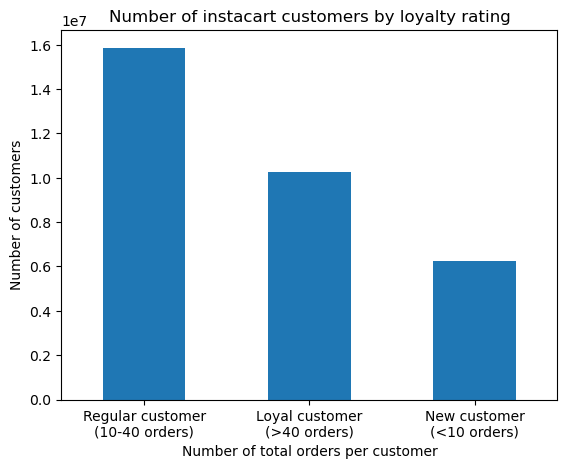

In [42]:
#creating a bar chart
barchart_loyalty_customers = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar(rot=0)
plt.xlabel("Number of total orders per customer")
plt.ylabel("Number of customers")
plt.title ("Number of instacart customers by loyalty rating")
plt.xticks([0,1,2],['Regular customer\n(10-40 orders)','Loyal customer\n(>40 orders)','New customer\n(<10 orders)'])

## Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [45]:
# creating a line chart. For this first we need a subset df
df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

In [26]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


Text(0.5, 1.0, 'Average price of Instacard products purchased by hour of day')

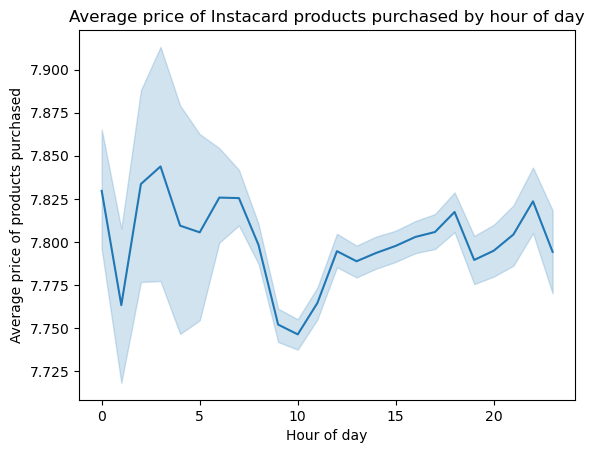

In [46]:
# creating a line chart of hour and prices
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')
plt.xlabel("Hour of day")
plt.ylabel("Average price of products purchased")
plt.title ("Average price of Instacard products purchased by hour of day")

### Q6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows

In [49]:
#creating subset for the line chart 
df_age_dependants = small[['age','number_dependants']]

In [29]:
df_age_dependants.head()

,age,number_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


Text(0.5, 1.0, 'Average number of dependants according to age')

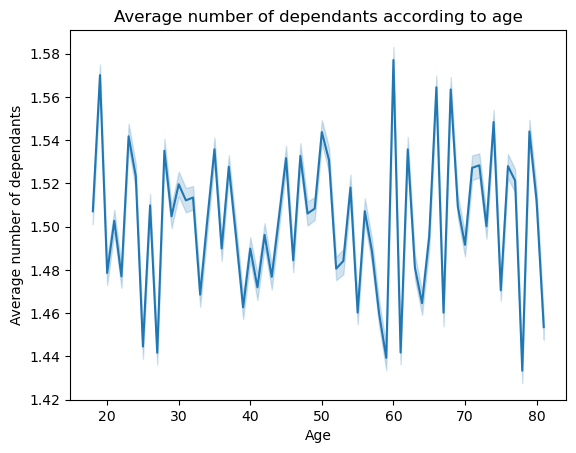

In [50]:
#creating line chart 
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'number_dependants')
plt.xlabel("Age")
plt.ylabel("Average number of dependants")
plt.title ("Average number of dependants according to age")

#### The line chart shows age vs number of dependants. It is difficult to draw conclutions from this chart. There is a lot going on.

### Q7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [53]:
# defining df subset for scatterplot
df_age_income = small[['age','income']]

Text(0.5, 1.0, 'Income according to age')

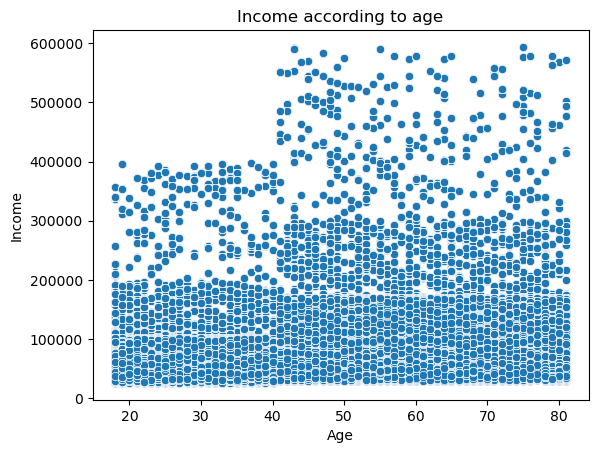

In [55]:
# creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title ("Income according to age")

In [56]:
scatterplot_age_income

<AxesSubplot:title={'center':'Income according to age'}, xlabel='Age', ylabel='Income'>

##### The scatter plot is representing age as the independable variable and income as the dependable variable.  There seems to be a positive correlation between age and income. Lower income values are seen from people below 40 years old. On the other side, after 40, income increases considerably.

### EXTRA PLOTS

([<matplotlib.axis.XTick at 0x1febb5f98b0>,
 [Text(0, 0, 'Mid-range product\n($5-15)'),
  Text(1, 0, 'Low-range product\n(<$5)'),
  Text(2, 0, 'High-range product\n($>15)')])

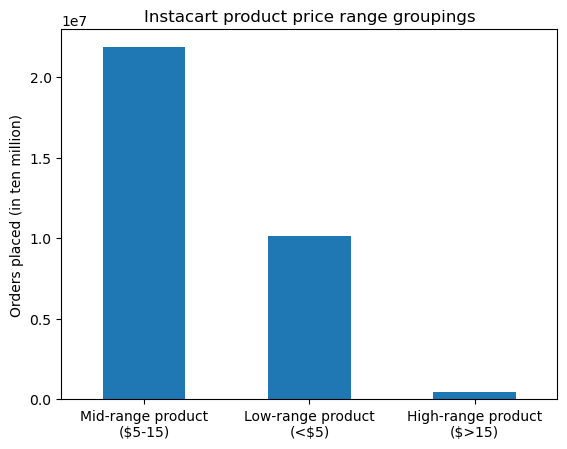

In [15]:
#creating a bar chart for price range products
barchart_products_range_customers = df_ords_prods_all['price_range_loc'].value_counts().plot.bar(rot=0)
plt.xlabel("")
plt.ylabel("Orders placed (in ten million)")
plt.title ("Instacart product price range groupings")
plt.xticks([0,1,2],['Mid-range product\n($5-15)','Low-range product\n(<$5)','High-range product\n($>15)'])

In [17]:
# creating a crosstab to compare different orders by department and price range
crosstab_orders_department = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['price_range_loc'], dropna = False)

In [18]:
crosstab_orders_department

price_range_loc,High-range product,Low-range product,Mid-range product
department_id,,,
1,0,681412,1553331
2,0,15972,20319
3,0,287938,884490
4,0,2697883,6781408
5,0,35243,118453
6,0,76974,192279
7,0,852974,1835149
8,0,29551,68165
9,0,299327,567300


([<matplotlib.axis.XTick at 0x1fec2bfb160>,
 [Text(0, 0, 'frozen'),
  Text(1, 0, 'other'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'produce'),
  Text(4, 0, 'alcohol'),
  Text(5, 0, 'international'),
  Text(6, 0, 'beverages'),
  Text(7, 0, 'pets'),
  Text(8, 0, 'dry goods\npasta'),
  Text(9, 0, 'bulk'),
  Text(10, 0, 'personal care'),
  Text(11, 0, 'meat seafood'),
  Text(12, 0, 'pantry'),
  Text(13, 0, 'breakfast'),
  Text(14, 0, 'canned goods'),
  Text(15, 0, 'dairy eggs'),
  Text(16, 0, 'household'),
  Text(17, 0, 'babies'),
  Text(18, 0, 'snacks'),
  Text(19, 0, 'deli'),
  Text(20, 0, 'missing')])

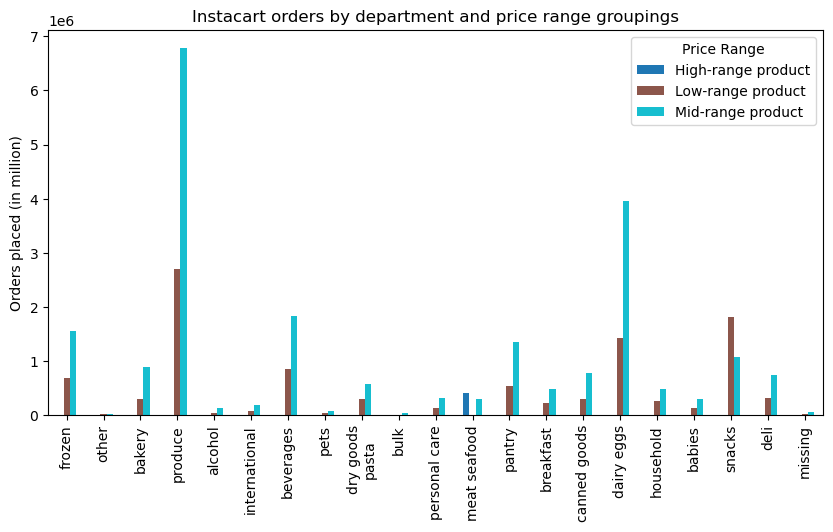

In [59]:
#creating a bar chart for orders by department and price range
barchart_products_range_department1 = crosstab_orders_department.iloc[:,[0,1,2]].plot.bar(rot=90, figsize=(10,5), colormap='tab10').legend(title="Price Range", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders placed (in million)")
plt.title ("Instacart orders by department and price range groupings")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods\npasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing'])

([<matplotlib.axis.XTick at 0x1fec2168280>,
 [Text(0, 0, 'frozen'),
  Text(1, 0, 'other'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'produce'),
  Text(4, 0, 'alcohol'),
  Text(5, 0, 'international'),
  Text(6, 0, 'beverages'),
  Text(7, 0, 'pets'),
  Text(8, 0, 'dry goods\npasta'),
  Text(9, 0, 'bulk'),
  Text(10, 0, 'personal care'),
  Text(11, 0, 'meat seafood'),
  Text(12, 0, 'pantry'),
  Text(13, 0, 'breakfast'),
  Text(14, 0, 'canned goods'),
  Text(15, 0, 'dairy eggs'),
  Text(16, 0, 'household'),
  Text(17, 0, 'babies'),
  Text(18, 0, 'snacks'),
  Text(19, 0, 'deli'),
  Text(20, 0, 'missing')])

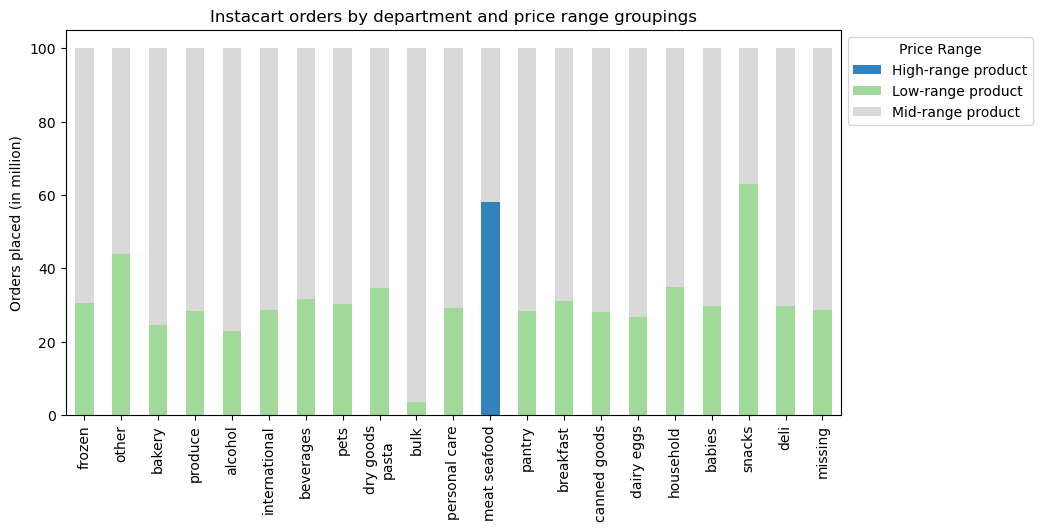

In [56]:
#creating a bar chart for orders by department and price range
barchart_products_range_department2 = crosstab_orders_department.iloc[:,[0,1,2]].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=90, figsize=(10,5), colormap='tab20c').legend(title="Price Range", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders placed (in million)")
plt.title ("Instacart orders by department and price range groupings")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods\npasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing'])

In [61]:
# creating a crosstab to compare different loyalty customers by department 
crosstab_loyalty_department = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['loyalty_flag'], dropna = False)

In [62]:
crosstab_loyalty_department

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609460,485283,1140000
2,10715,7719,17857
3,379873,223704,568851
4,3147376,1736622,4595293
5,38723,37698,77275
6,78394,57103,133756
7,855017,512871,1320235
8,25469,20536,51711
9,242580,189327,434720


([<matplotlib.axis.XTick at 0x1fec2beff10>,
 [Text(0, 0, 'frozen'),
  Text(1, 0, 'other'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'produce'),
  Text(4, 0, 'alcohol'),
  Text(5, 0, 'international'),
  Text(6, 0, 'beverages'),
  Text(7, 0, 'pets'),
  Text(8, 0, 'dry goods\npasta'),
  Text(9, 0, 'bulk'),
  Text(10, 0, 'personal care'),
  Text(11, 0, 'meat seafood'),
  Text(12, 0, 'pantry'),
  Text(13, 0, 'breakfast'),
  Text(14, 0, 'canned goods'),
  Text(15, 0, 'dairy eggs'),
  Text(16, 0, 'household'),
  Text(17, 0, 'babies'),
  Text(18, 0, 'snacks'),
  Text(19, 0, 'deli'),
  Text(20, 0, 'missing')])

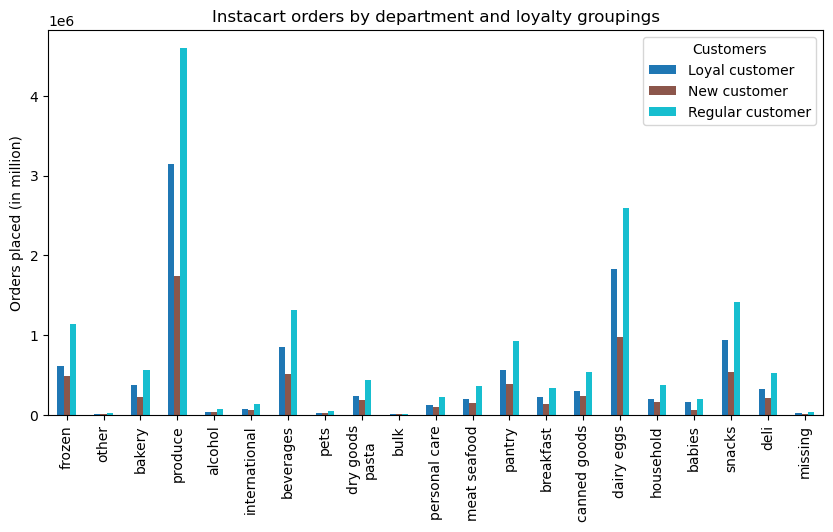

In [65]:
#creating a bar chart for loyalty by department 
barchart_loyalty_department1 = crosstab_loyalty_department.iloc[:,[0,1,2]].plot.bar(rot=90, figsize=(10,5), colormap='tab10').legend(title="Customers", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders placed (in million)")
plt.title ("Instacart orders by department and loyalty groupings")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods\npasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing'])

In [ ]:
crosstab_loyalty_days_prior = pd.crosstab(df_ords_prods_all['loyalty_flag'], df_ords_prods_all['loyalty_flag'], dropna = False)

In [68]:
# descriptive statistics for the loyalty_flag
df_ords_prods_all.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean', 'min', 'max', 'sum']}).round()

days_since_prior_order                        
                                   mean  min   max          sum
loyalty_flag                                                   
Loyal customer                      6.0  0.0  30.0   60841390.0
New customer                       18.0  0.0  30.0   92611617.0
Regular customer                   12.0  0.0  30.0  183319997.0

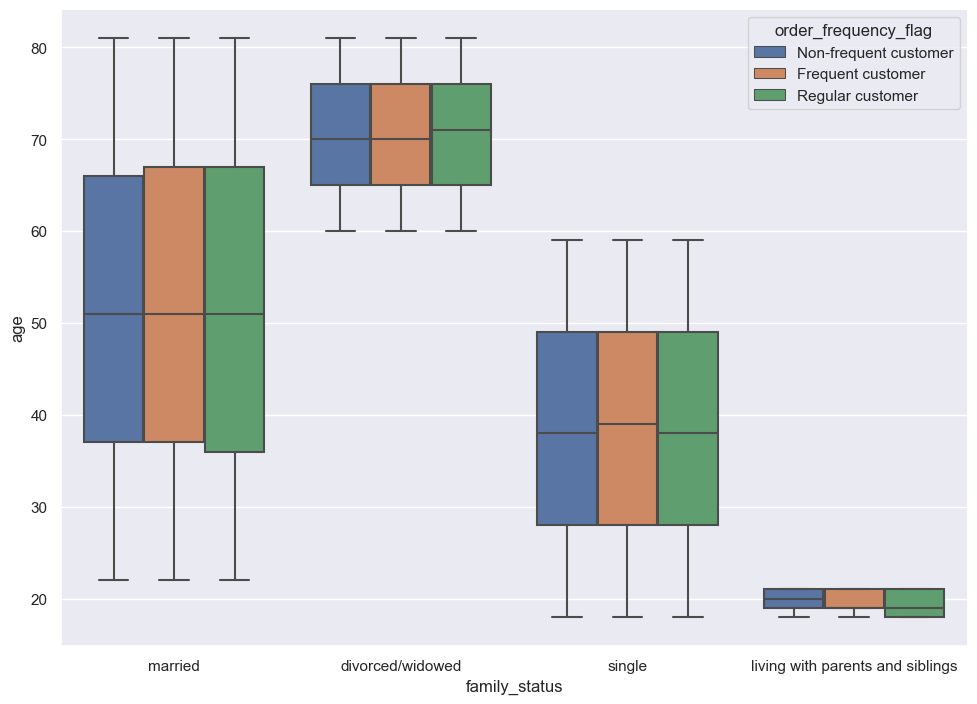

In [77]:
# create grouped boxplot 
boxplot_family_age_order = sns.boxplot(x = df_ords_prods_all['family_status'],
            y = df_ords_prods_all['age'],
            hue = df_ords_prods_all['order_frequency_flag'])
sns.set(rc={'figure.figsize':(11.7,8.27)})


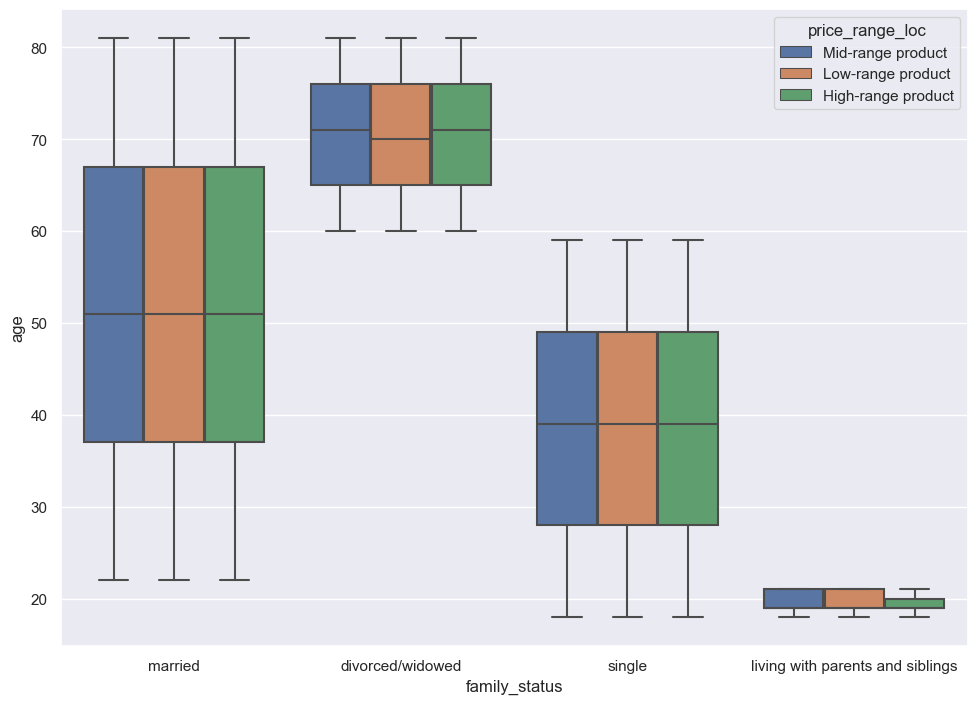

In [78]:
# create grouped boxplot 
boxplot_family_age_price = sns.boxplot(x = df_ords_prods_all['family_status'],
            y = df_ords_prods_all['age'],
            hue = df_ords_prods_all['price_range_loc'])
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Export your visualizations as “.png” files in your relevant project folder.¶

### Exporting plots

In [14]:
# Exporting .png
bar_ords_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ords_week.png'), bbox_inches='tight')

In [13]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_31.01.png'), bbox_inches='tight')

In [10]:
hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_day_31.01.png'), bbox_inches='tight')

In [29]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices_31.01.png'), bbox_inches='tight')

In [30]:
line_chart_week_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_week_prices_31.01.png'), bbox_inches='tight')

In [39]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_31.01.png'), bbox_inches='tight')

In [43]:
barchart_loyalty_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_loyalty_customers_31.01.png'), bbox_inches='tight')

In [47]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_order_hour_of_day_prices_31.01.png'), bbox_inches='tight')

In [51]:
line_chart_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_dependants_31.01.png'), bbox_inches='tight')

In [57]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income_31.01.png'), bbox_inches='tight')

### Saving extra plots

In [16]:
barchart_products_range_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_range_customers.png'), bbox_inches='tight')

In [60]:
barchart_products_range_department1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_range_departments1.png'), bbox_inches='tight')

In [58]:
barchart_products_range_department2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_range_departments1.png'), bbox_inches='tight')

In [66]:
barchart_loyalty_department1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_departments1.png'), bbox_inches='tight')

In [79]:
boxplot_family_age_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxplot_family_age_order.png'), bbox_inches='tight')

In [80]:
boxplot_family_age_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxplot_family_age_price.png'), bbox_inches='tight')